<a href="https://colab.research.google.com/github/DavorJordacevic/NEURAL-NETWORKS-/blob/master/Shallow_neural_network_with_Keras_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow_neural_network_with_Keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# generate two datasets
X,y = make_moons(n_samples = 6000, noise = 0.08)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6000, 2)
(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


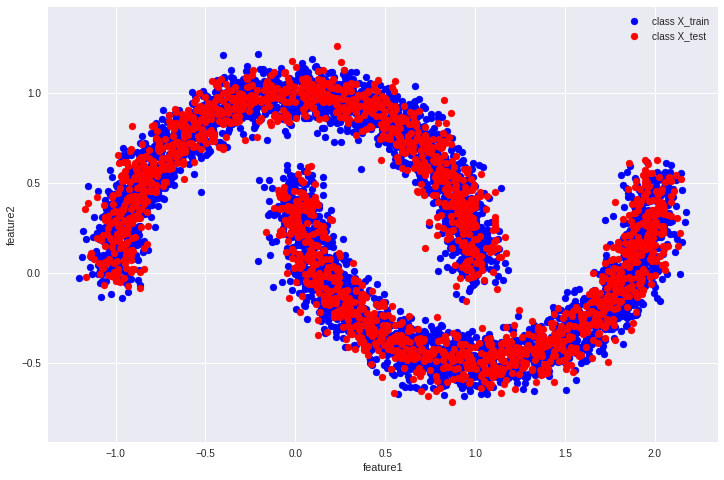

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(4020, 2)
y_train:	(4020,)
x_test:		(1980, 2)
y_test:		(1980,)


In [0]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T)
)

Train on 4020 samples, validate on 1980 samples
Epoch 1/400
4020/4020 [==============================] - 0s 65us/step - loss: 0.5934 - acc: 0.7833 - val_loss: 0.4653 - val_acc: 0.8177
Epoch 2/400
4020/4020 [==============================] - 0s 5us/step - loss: 0.3916 - acc: 0.8269 - val_loss: 0.2997 - val_acc: 0.8596
Epoch 3/400
4020/4020 [==============================] - 0s 6us/step - loss: 0.2822 - acc: 0.8662 - val_loss: 0.2462 - val_acc: 0.8778
Epoch 4/400
4020/4020 [==============================] - 0s 6us/step - loss: 0.2619 - acc: 0.8697 - val_loss: 0.2458 - val_acc: 0.8818
Epoch 5/400
4020/4020 [==============================] - 0s 5us/step - loss: 0.2577 - acc: 0.8803 - val_loss: 0.2395 - val_acc: 0.8889
Epoch 6/400
4020/4020 [==============================] - 0s 6us/step - loss: 0.2510 - acc: 0.8823 - val_loss: 0.2444 - val_acc: 0.8854
Epoch 7/400
4020/4020 [==============================] - 0s 6us/step - loss: 0.2540 - acc: 0.8781 - val_loss: 0.2382 - val_acc: 0.8929
Epoch 

In [0]:
prediction_values = model.predict_classes(X_test)
prediction_values.shape

(1980, 1)

In [0]:
print(np.mean(results.history["val_acc"]))

0.9924318184157213


In [0]:
# evaluate the model
scores = model.evaluate(X_train,y_train.T)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4020/4020 [==============================] - 0s 23us/step

acc: 100.00%


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "down right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


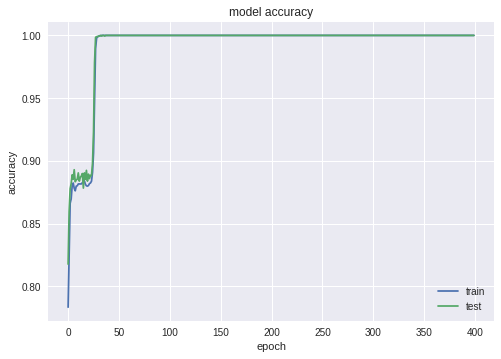

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.5934

Minimum Loss : 0.0000

Loss difference : 0.5934


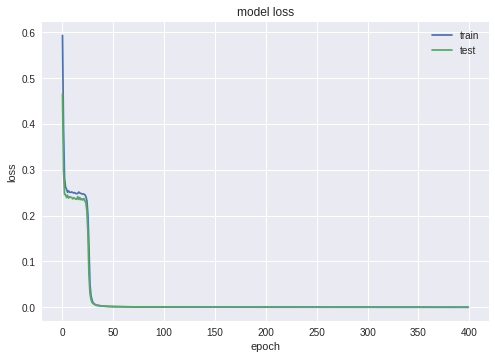

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# Visualization

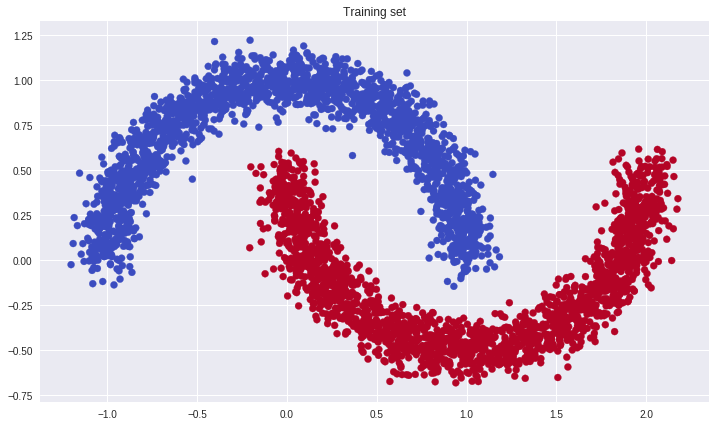

In [0]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

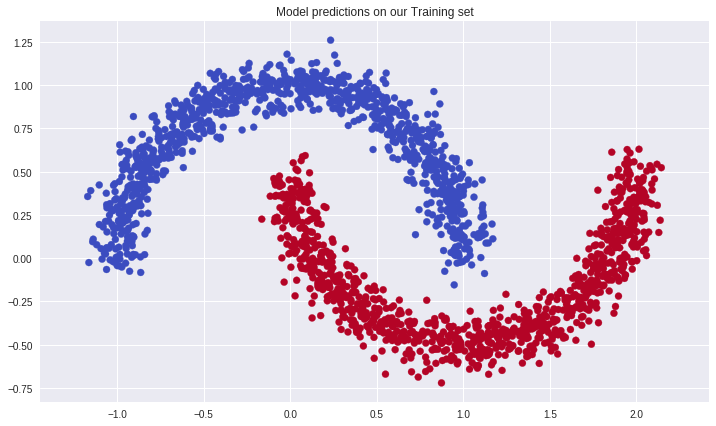

In [0]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Training set')
plt.axis('equal');

Text(0.5,1,'Model predictions on our Training set')

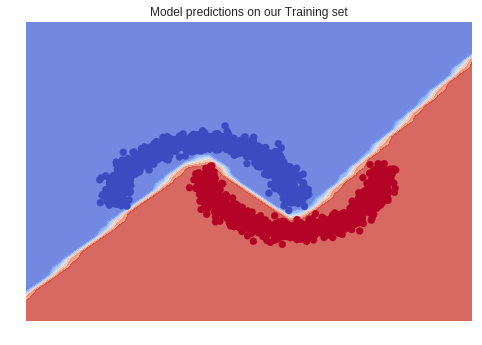

In [0]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Training set')


In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 4) :
 [[-0.94681966  3.9175334  -0.5153676   0.83838284]
 [ 0.6819348   1.7101226   0.27176163 -0.8794603 ]]
Input layer biases (4,) :
 [ 0.9811408  -2.2587273  -0.19095087  0.8981541 ]

Hidden layer weights (4, 6) :
 [[-2.1027906   1.994722    2.126987   -1.5196211   1.87136     4.901637  ]
 [-3.0793326   2.1449883  -0.52849984 -2.0121589   1.2021099   5.269644  ]
 [-1.9709971   1.8406358   4.52692    -2.1146953   0.61929643  3.6172986 ]
 [ 1.9382954   0.12047494 -7.373403    1.8410066  -0.13284038 -1.0512148 ]]
Hidden layer biases (6,) :
 [ 0.9605058   0.24884424 -0.00948193  0.9725334   0.50816214  0.7731043 ]

Output layer weights (6, 1) :
 [[ 2.8814569]
 [-1.3720654]
 [-5.050639 ]
 [ 1.980042 ]
 [-1.3024827]
 [-5.88379  ]]
Output layer biases (1,) :
 [-0.4479229]


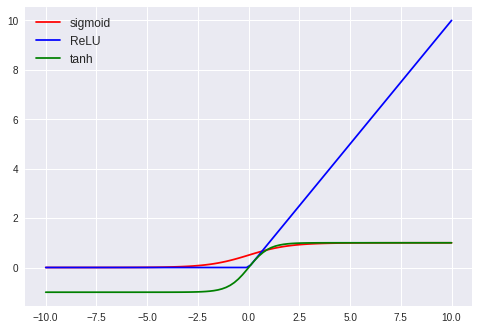

In [0]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
def tanh(z):
    return np.tanh(z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.plot(z, tanh(z),'g',label ='tanh')
plt.legend(fontsize=12)

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))
out22 = np.zeros((50*50, 1))
out23 = np.zeros((50*50, 1))
out24 = np.zeros((50*50, 1))
out25 = np.zeros((50*50, 1))
out26 = np.zeros((50*50, 1))

out31  = np.zeros((50*50, 1))

for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = tanh(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = tanh(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = tanh(n13)

    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = tanh(n14)
  
    # Hidden layer
    n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + biases1[0]
    a21 = ReLU(n21)

    n22 = a11 * weights1[0][1] + a12 * weights1[1][1] + a13 * weights1[2][1] + a14 * weights1[3][1] + biases1[1]
    a22 = ReLU(n22)
    
    n23 = a11 * weights1[0][2] + a12 * weights1[1][2] + a13 * weights1[2][2] + a14 * weights1[3][2] + biases1[2]
    a23 = ReLU(n23)
    
    n24 = a11 * weights1[0][3] + a12 * weights1[1][3] + a13 * weights1[2][3] + a14 * weights1[3][3] + biases1[3]
    a24 = ReLU(n24)
    
    n25 = a11 * weights1[0][4] + a12 * weights1[1][4] + a13 * weights1[2][4] + a14 * weights1[3][4] + biases1[4]
    a25 = ReLU(n25)
    
    n26 = a11 * weights1[0][5] + a12 * weights1[1][5] + a13 * weights1[2][5] + a14 * weights1[3][5] + biases1[5]
    a26 = ReLU(n26)

    # Output layer
    
    n31 = a21 * weights2[0][0] + a22 * weights2[1][0] \
        + a23 * weights2[2][0] + a24 * weights2[3][0] \
        + a25 * weights2[4][0] + a26 * weights2[5][0] \
        + biases2[0]
    a31 = sigmoid(n31)
    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a11
    out12[i*50+j] = a12
    out13[i*50+j] = a13
    out14[i*50+j] = a14
    
    out21[i*50+j] = a21
    out22[i*50+j] = a22
    out23[i*50+j] = a23
    out24[i*50+j] = a24
    out25[i*50+j] = a25
    out26[i*50+j] = a26
    
    out31[i*50+j] = a31

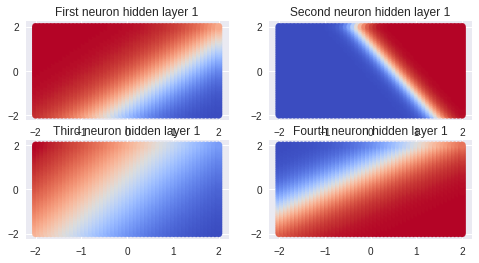

In [0]:
plt.figure(figsize =(8,4))

# First neuron, input layer
plt.subplot(221)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(222)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(223)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(224)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

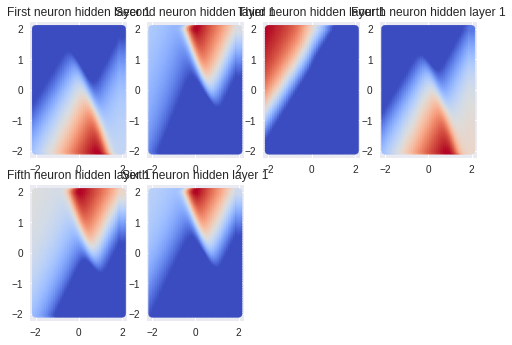

In [0]:
# First neuron, hidden layer
plt.subplot(241)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# Second neuron, hidden layer
plt.subplot(242)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out22.reshape(-1), cmap=cm.coolwarm)

# Third neuron, hidden layer
plt.subplot(243)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out23.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, hidden layer
plt.subplot(244)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out24.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, hidden layer
plt.subplot(245)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out25.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, hidden layer
plt.subplot(246)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out26.reshape(-1), cmap=cm.coolwarm)

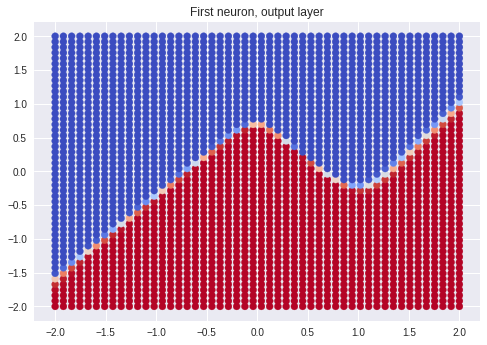

In [0]:
# first neuron, output layer
plt.title('First neuron, output layer')
plt.scatter(result[:, 0], result[:, 1], c= out31.reshape(-1), cmap=cm.coolwarm)

Text(0.5,0.92,'3D visualization of our neural network first layer fourth neuron')

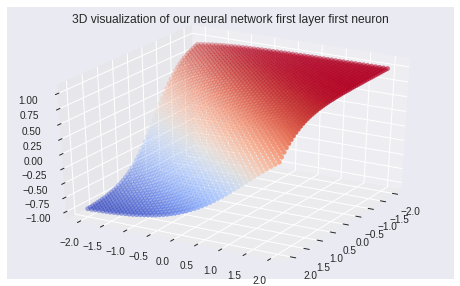

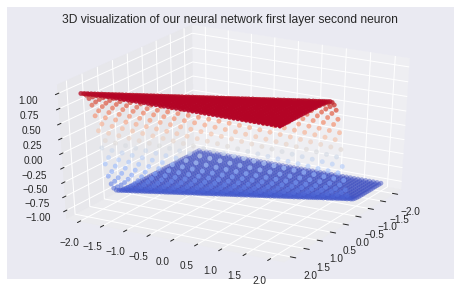

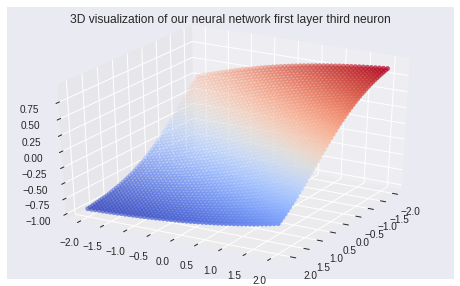

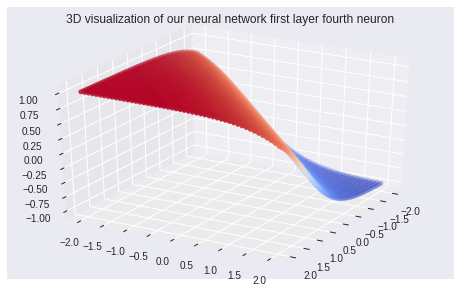

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

Text(0.5,0.92,'3D visualization of our neural network second layer sixht neuron')

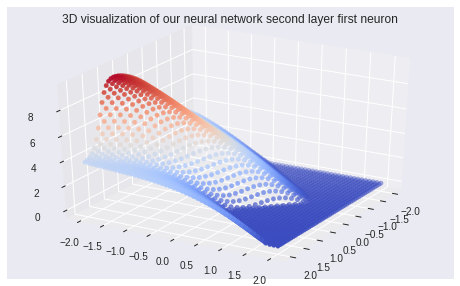

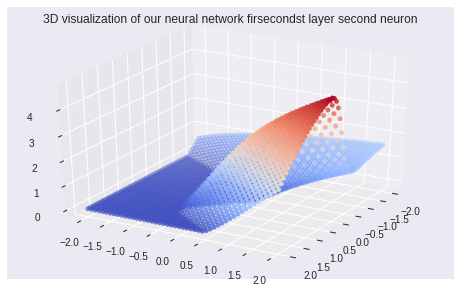

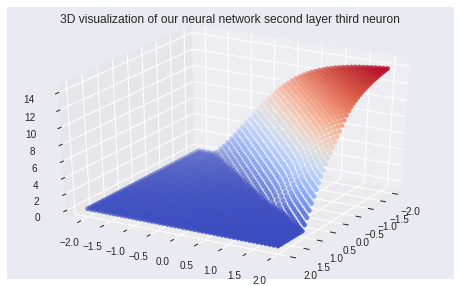

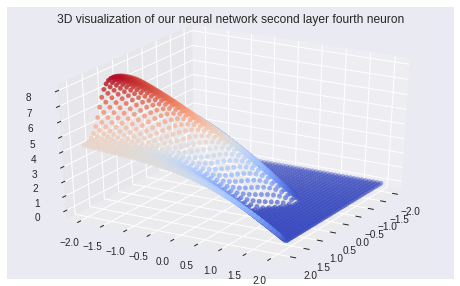

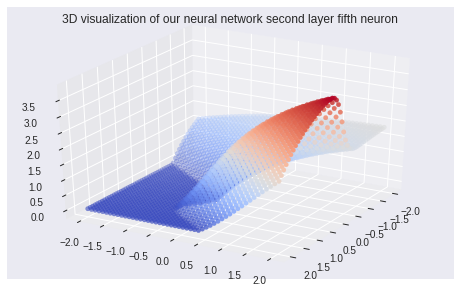

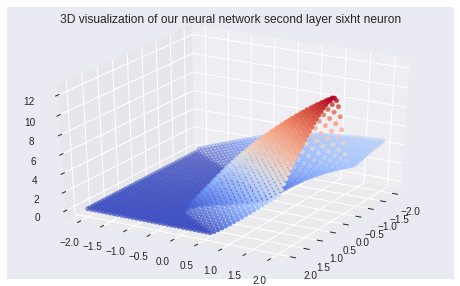

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out22.reshape(-1), c=out22.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network firsecondst layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out23.reshape(-1), c=out23.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out24.reshape(-1), c=out24.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out25.reshape(-1), c=out25.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out26.reshape(-1), c=out26.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer sixht neuron')


Text(0.5,0.92,'3D visualization of our neural network output layer first neuron')

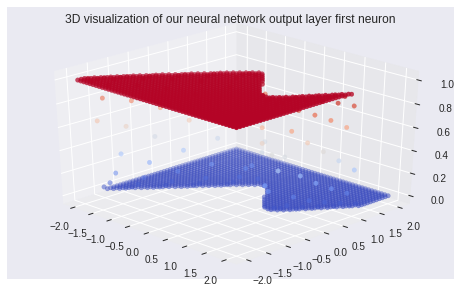

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out31.reshape(-1), c=out31.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer first neuron')